## Implementation of the Metropolis-Hastings MCMC Algorithm

Implemented in two dimensions, for the sake of visualizing how the algorithm works

In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(suppress=True)
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,8)

In [2]:
# Builds the target distribution
target = np.append(np.random.normal(300,60,40000),
                   np.random.normal(600,100,30000))

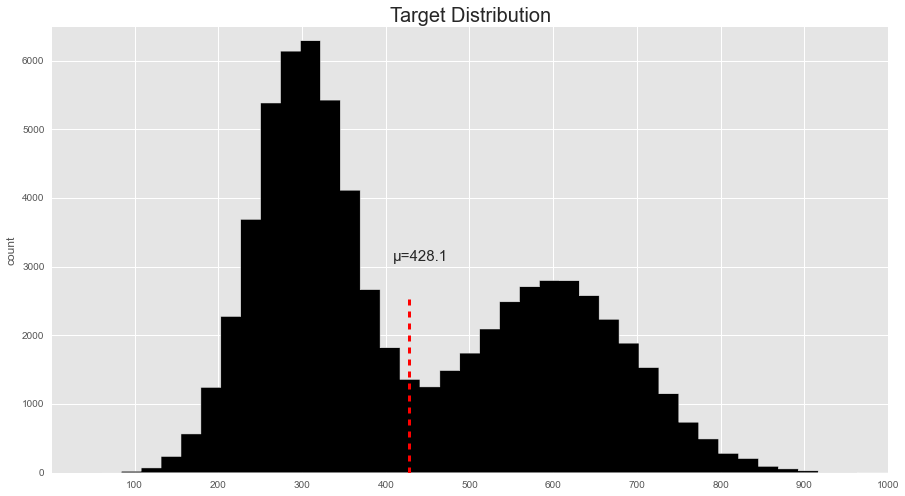

In [5]:
plt.hist(target, bins=40, histtype='stepfilled', color='black')
plt.title('Target Distribution', fontsize=20)
plt.ylabel('count')
plt.xlim([0,1000])
plt.ylim([0,6500])
plt.xticks(range(100,1001, 100))
plt.text(410,3100, u'µ={:.4}'.format(np.mean(target)), fontsize=15)
_ = plt.axvline(x= np.mean(target), ymax=.4, color='red', linewidth=3, linestyle='--')
# plt.savefig('test.png', format='png', dpi=800)

In [6]:
def get_traces(d, n_samples):
    
    data = d.astype(int)
    probs = np.bincount(data) # yields an array of counts per in range (i,i+1)
    traces = np.array([])
    
    current = int(np.random.uniform(data.min(), data.max() - 1))
    for i in xrange(n_samples):
        traces = np.append(traces, current)
        # eventually create a function that chooses a good jumping distance
        # If the p is low for the current position, make the jump bigger
        proposed = int(np.random.normal(current, 120))
        # ensures we don't leave the bounds
        while proposed > data.max() or proposed < data.min():
            proposed = int(np.random.normal(current, 120))

        a = (float(probs[proposed]) / (probs[current]+.001)) # so we're not dividing by 0
        if a > 1:
            current = proposed
        else:
            if np.random.random() <= a:
                current = proposed
    return traces

In [7]:
traces = get_traces(target, 5000)

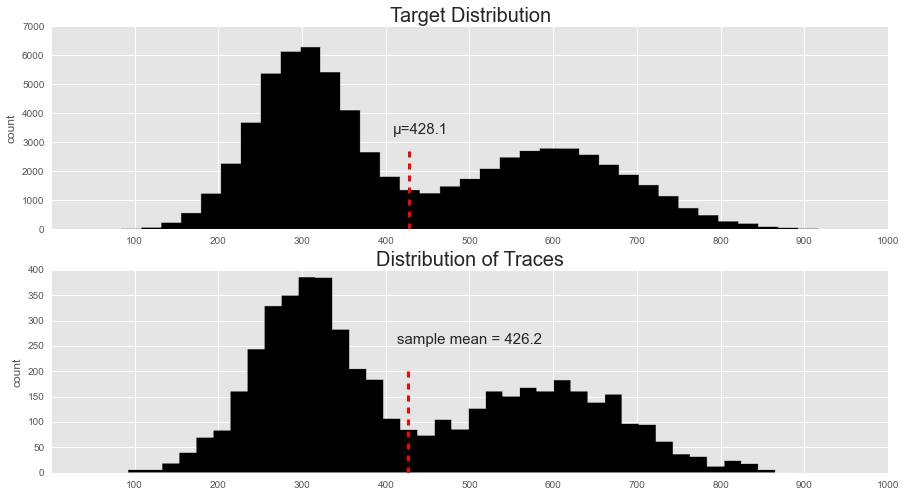

In [33]:
# Plots the target distribution and the distibution of the traces
plt.subplot(2,1,1)
plt.hist(target, bins=40, histtype='stepfilled', color='black')
plt.title('Target Distribution', fontsize=20)
plt.ylabel('count')
plt.xlim([0,1000])
plt.xticks(range(100,1001, 100))
plt.text(410,3300, u'µ={:.4}'.format(np.mean(target)), fontsize=15)
plt.axvline(x= np.mean(target), ymax=.4, color='red', linewidth=3, linestyle='--')

plt.subplot(2,1,2)
plt.hist(traces, bins=40, histtype='stepfilled', color='black')
plt.title('Distribution of Traces', fontsize=20)
plt.ylabel('count')
plt.xlim([0,1000])
plt.xticks(range(100,1001, 100))
plt.text(413,255, u'sample mean = {:.4}'.format(np.mean(traces)), fontsize=15)
_ = plt.axvline(x=np.mean(traces), ymax=.5, color='red',linewidth=3,linestyle='--')

# plt.savefig('target_and_test.png', format='png', dpi=500)

Not only is the distribution of the traces very close to the actual distribution, the sample mean is also very close. With fewer than 5000 sample points drawn, we are very close to aproximating the shape of the target distribution.

In [26]:
# We get 200 sets of only 2000 traces
# Gets the mean of eact set
n_means = 200
means = [np.mean(get_traces(target,2000)) for _ in xrange(n_means)]

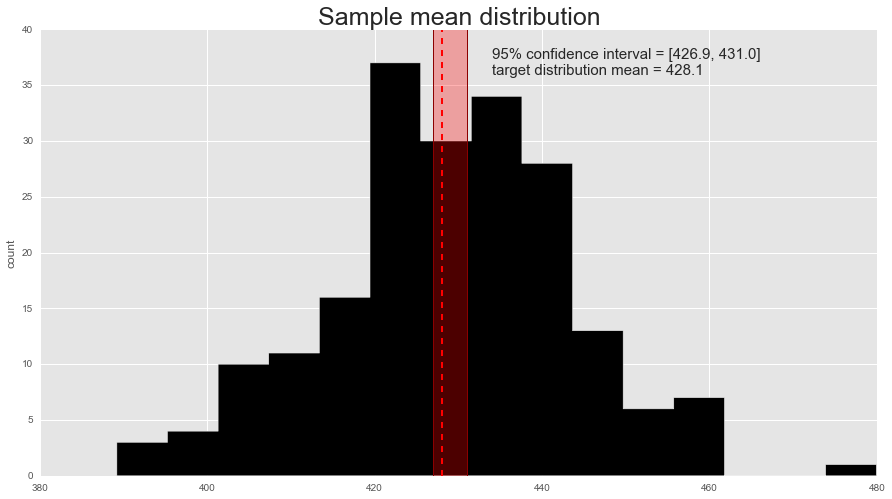

In [32]:
se = np.std(means) / (n_means**.5)
ci_lims = (np.mean(means) - 1.96*se, np.mean(means) + 1.96*se)

# Plot the distribution of means
plt.hist(means, bins=15, histtype='stepfilled', color='black')
plt.title('Sample mean distribution', fontsize=25)
plt.ylabel('count')
plt.axvspan(*ci_lims, alpha=.3, color='red')
for lim in ci_lims:
    plt.axvline(x=lim, ymax=1, color='darkred', linestyle='solid', alpha=1, linewidth=1)
plt.axvline(x=np.mean(target), ymax=1, color='red', linewidth=2, linestyle='--')
_ = plt.text(434,36, 
        '95% confidence interval = [{:.4}, {:.4}]\n'.format(*ci_lims) +
        'target distribution mean = {:.4}'.format(np.mean(target)),
        fontsize=15)

We can see that the sample means of the trace distributions converge on the true distribution's expected value with a high degree of accuracy